# **Analysis of Screen Time and Mental Wellness**
---

## **Introduction**
This project explores the relationship between screen time and mental wellness. Using survey data from 400 participants, we looked at how daily digital habits connect with factors such as sleep quality, stress, and productivity. With screens now embedded in almost every part of our lives, this is a topic that resonates broadly and has clear implications for both personal wellbeing and workplace performance.
The analysis is designed to shed light on three key questions:
- Is there a measurable link between screen time and mental wellness?
- Does leisure screen time differ from work screen time in its impact?
- Which groups appear more vulnerable to the negative effects of screen use?

Beyond identifying associations, we also tested whether it is possible to predict mental wellness levels based on lifestyle factors like screen use, sleep, and stress. To do this, we compared different types of predictive models:
- Regression models (which estimate the strength and direction of relationships between factors), and
- Machine learning models (which are designed to detect more complex patterns in the data).

To ensure the results are reliable, we used a process called cross‑validation—essentially, testing the models on different slices of the data to check that findings hold up consistently. Model performance was then assessed using standard predictive accuracy measures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r"C:\Users\jmjmu\OneDrive\Documents\IOD Labs Data\Mini Project 2\ScreenTime vs MentalWellness.csv")

In [3]:
# Display the first 5 rows of the DataFrame for quick inspection of its structure and contents
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

In [5]:
df.columns[df.isnull().any()]

Index(['Unnamed: 15'], dtype='object')

In [6]:
df[df["Unnamed: 15"].notnull()]

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15


- The column named "Unamed: 15" found to contain null rows and so I decided to drop the column as actioned below as it would not have an adverse impact on my analysis.

In [7]:
# Droping of the column which contains the null rows
df = df.drop(columns=["Unnamed: 15"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

- No missing values now: All columns are fully populated
- 11 numeric columns 
- 4 categorical columns

In [9]:
df.describe()

,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


**Observations:**
- Screen time is excessive and leisure‑dominated — participants report a median of ~9 hours/day, with leisure use far outweighing work use, highlighting a key behavioural factor to test against wellness.
- Sleep quantity looks normal but quality is poor — most get ~7 hours/night, yet quality scores cluster at the lowest rating, suggesting a disconnect between hours slept and restorative rest.
- Stress is consistently high — average levels exceed 8/10, with three‑quarters of participants above 6.9, making stress a critical driver to examine alongside screen use.
- Wellness scores are alarmingly low — median wellness is just 15/100, heavily skewed toward the bottom of the scale, providing a sensitive outcome for testing associations with stress, sleep, and screen time.

#### **Plot of Mental Wellness Index Scores**

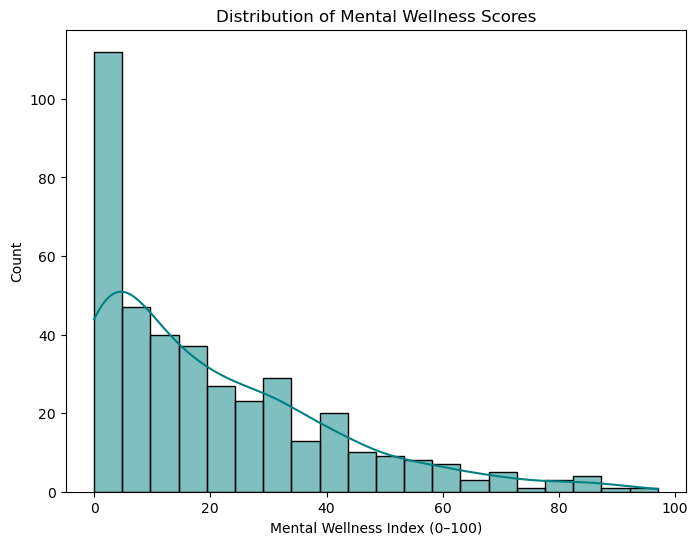

In [10]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df["mental_wellness_index_0_100"], bins=20, kde=True, color="teal")
plt.title("Distribution of Mental Wellness Scores")
plt.xlabel("Mental Wellness Index (0–100)")
plt.ylabel("Count")
plt.show()

**Observations:**
- Confirmation that lower wellness scores are much more common in this population, while high wellness scores are relatively rare

#### **Pair Plot of Key Features vs Mental Wellness**

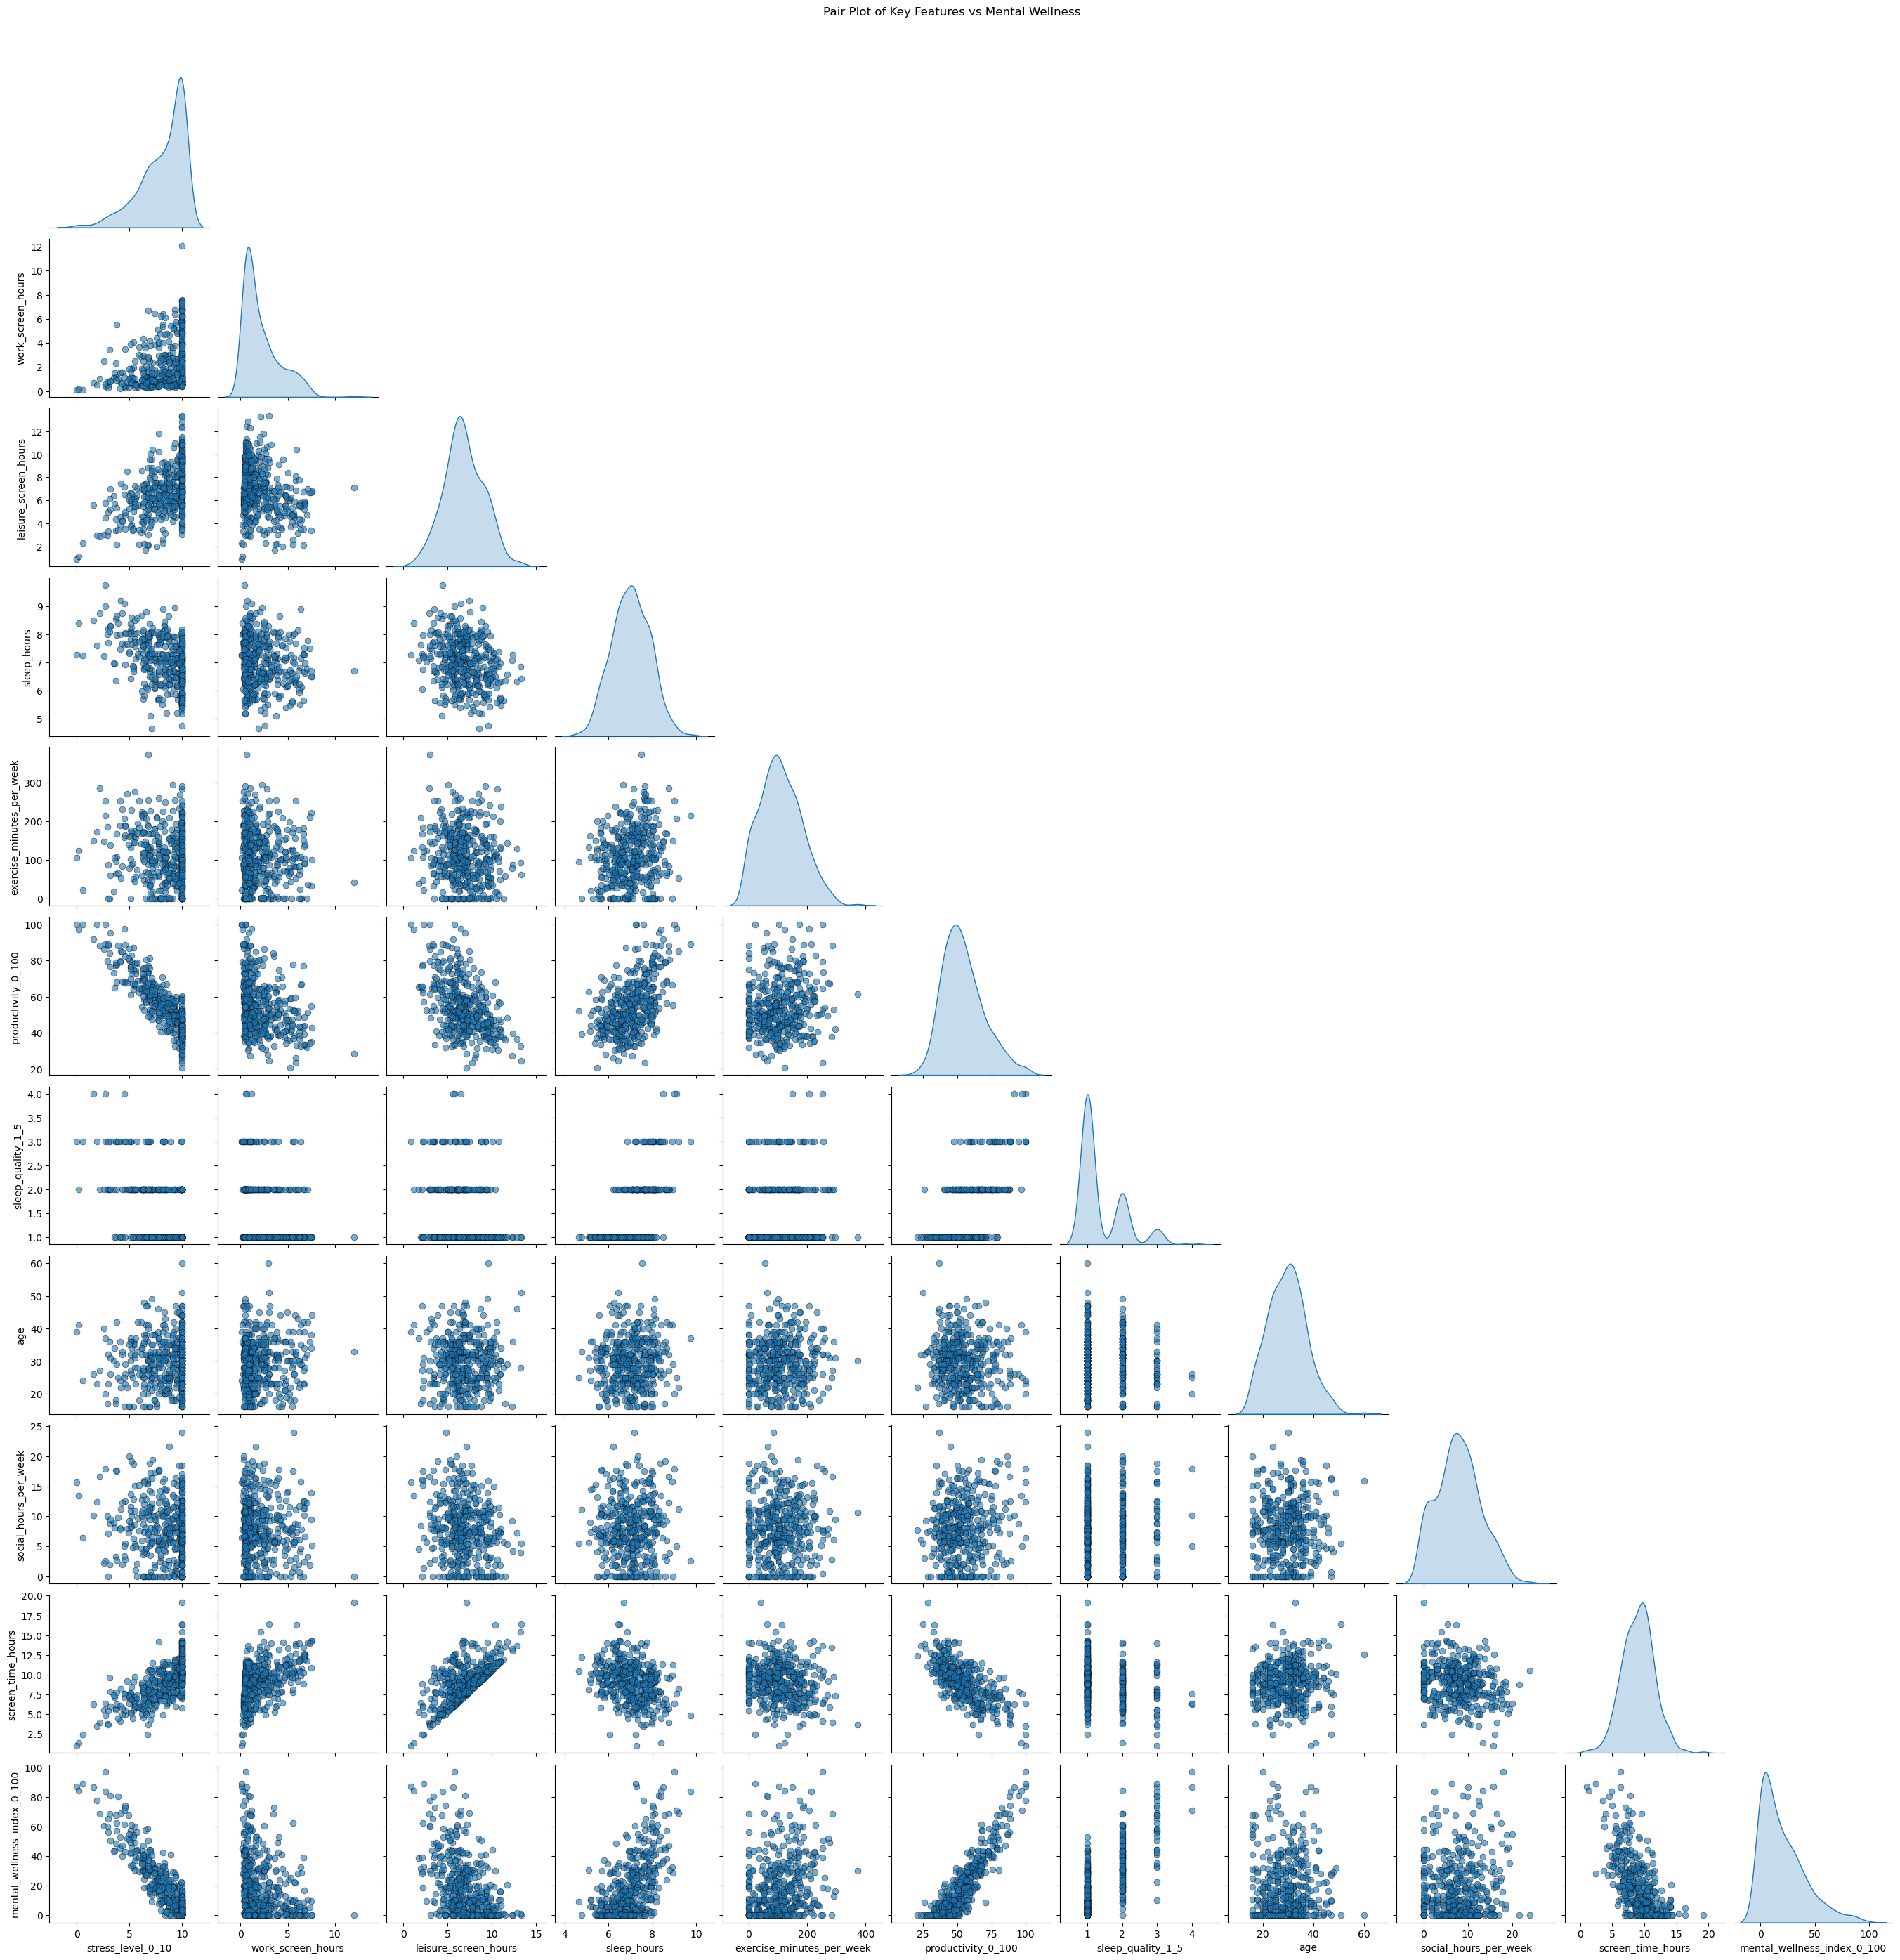

In [11]:
features_to_plot = [
    "stress_level_0_10",
    "work_screen_hours",
    "leisure_screen_hours",
    "sleep_hours",
    "exercise_minutes_per_week",
    "productivity_0_100",
    "sleep_quality_1_5",
	"age",
	"social_hours_per_week",
	"screen_time_hours",
    "mental_wellness_index_0_100"
]

# Create the pair plot
sns.pairplot(df[features_to_plot], diag_kind="kde", corner=True,
             plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"})

plt.suptitle("Pair Plot of Key Features vs Mental Wellness", y=1.02)
plt.show()

**Observations:**
- Strongest Linear Relationships;
    - Stress level - Mental Wellness: Negative linear trend, higher stress associated with lower wellness
    - Productivity - Mental Wellness: Positive linear trend, higher productivity scores align with higher wellness
    - Sleep quality - Mental Wellness: Positive linear relationship, better subjective sleep quality corresponds to higher wellness
- Moderate or Secondary Relationship;
    - Mental Wellness - Sleep Hours: Wellness improves up to a point (around 7–8 hours), then flattens or dips
    - Mental Wellness - Screen Time (work/leisure/total): no strong linear slope. May matter more in interaction with stress or sleep
- Weak or No Clear Linear Relationships;
    - Mental Wellness - Social Hours per Week: no strong linear slope. May matter more in interaction with stress or sleep
    - Mental Wellness - Social Hours per Week : widely scattered, no obvious linear trend

#### **Plot of Correlation Heatmap**

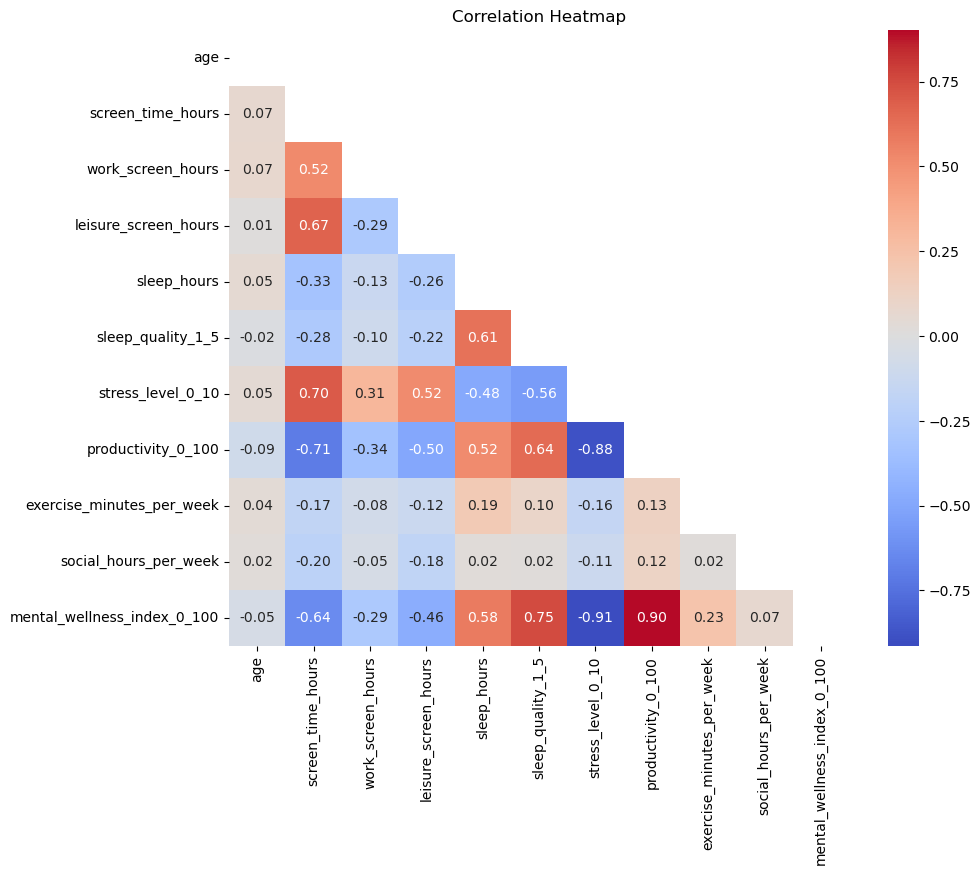

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    mask=mask,            # hide upper triangle
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap")
plt.show()

**Observations:**
- Shows wellness is most strongly tied to stress (negative) and sleep quality (positive).
- Lifestyle factors like exercise and productivity also playing important roles.
- Screen time shows a moderate but consistent negative association.

**Boxplots of Wellness by Gender and Occupation**

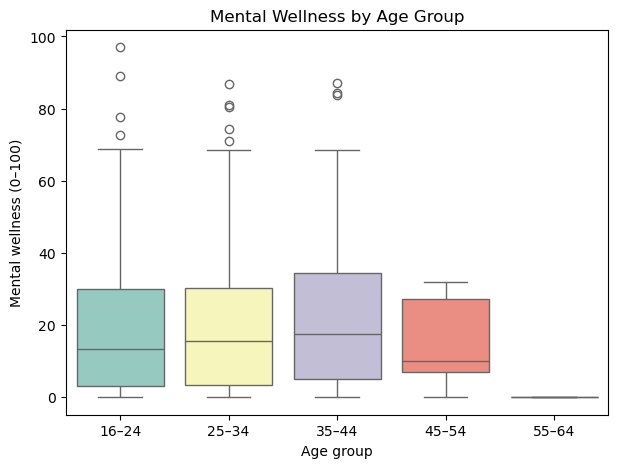

In [13]:
# --- Wellness by Age (binned into groups) ---
# Create age bands for clearer comparison
df["age_band"] = pd.cut(df["age"], bins=[15,24,34,44,54,64],
                        labels=["16–24","25–34","35–44","45–54","55–64"])

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="age_band",
    y="mental_wellness_index_0_100",
    hue="age_band",          # assign hue
    palette="Set3",
    legend=False           # avoid duplicate legend
)
plt.title("Mental Wellness by Age Group")
plt.xlabel("Age group")
plt.ylabel("Mental wellness (0–100)")
plt.show()

**Observations:**
- Younger groups (16–34): Higher median wellness, more variability.
- Middle-aged (35–44): Transitional — wellness begins to dip, variability narrows.
- Older groups (45–64): Lower and more consistent wellness.
- The 55–64 bracket: Lowest median and least spread.

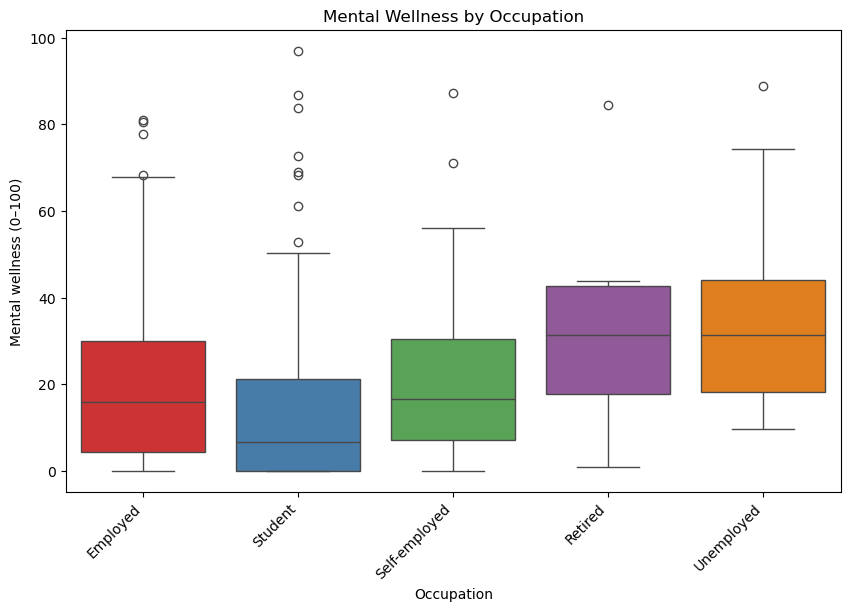

In [14]:
# --- Wellness by Occupation ---
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="occupation",
    y="mental_wellness_index_0_100",
    hue="occupation",          # assign hue
    palette="Set1",
    legend=False           # avoid duplicate legend
)
plt.title("Mental Wellness by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Mental wellness (0–100)")
plt.xticks(rotation=45, ha="right")  # rotate labels if many occupations
plt.show()

**Observations:**
- Retired individuals show the highest median mental wellness.
- Students show the lowest median wellness, despite some high outliers.
- Employed and Unemployed groups sit in the middle, with wide variability.
- Self-employed individuals show slightly better and more consistent wellness.

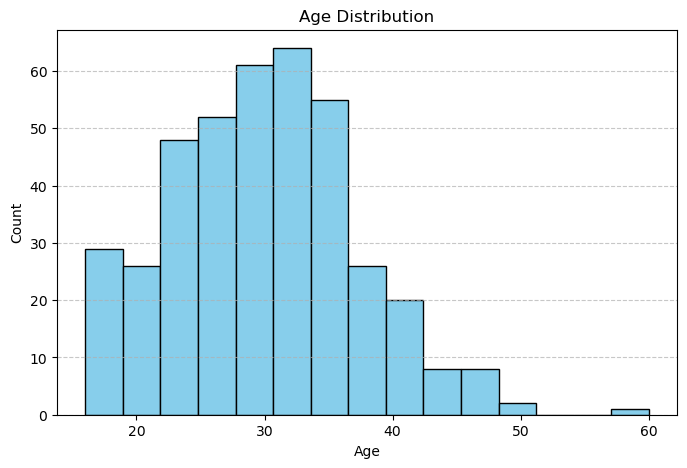

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df["age"], bins=15, edgecolor="black", color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Observations:**
- Age distribution is right-skewed, with the majority of individuals clustered between 25 and 30 years old
- Sharp decline in representation as age increases beyond 40.
- Sample is predominantly young population with limited data from older age groups.

### **Assessment of Target Variable and Feature Sets**

In [16]:
# Baseline feature set - current core predictors
base_features = [
    "stress_level_0_10",
    "work_screen_hours",
    "leisure_screen_hours",
    "sleep_hours",
    "exercise_minutes_per_week",
    "productivity_0_100",
    "sleep_quality_1_5",
	"age",
	"social_hours_per_week",
	"screen_time_hours" 
]

In [17]:
# Create engineered features

# Sleep efficiency - combines sleep quality and sleep hours into a single metric
df["sleep_efficiency"] = df["sleep_quality_1_5"] * df["sleep_hours"]

# Screen time × sleep
df["screen_sleep_interaction"] = df["screen_time_hours"] * df["sleep_hours"]

# Screen time × stress
df["screen_stress_interaction"] = df["screen_time_hours"] * df["stress_level_0_10"]

# Categorical encoding - creates binary columns (0/1) for gender, occupation & work mode
categorical_features = ["gender", "occupation", "work_mode"]

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [18]:
# Combine all feature groups into one list
final_features = (
    base_features
    + ["sleep_efficiency", "screen_sleep_interaction", "screen_stress_interaction"]
    + [col for col in df_encoded.columns if col.startswith(("gender_", "occupation_", "work_location_"))]
)

In [19]:
# Define target
target = "mental_wellness_index_0_100"

# Re-compute correlations using final_features + target
corr_features = final_features + [target]

corr_matrix = df_encoded[corr_features].corr()

# Quick check: correlations of predictors with the target
corrs = corr_matrix[target].drop(target).sort_values(ascending=False)

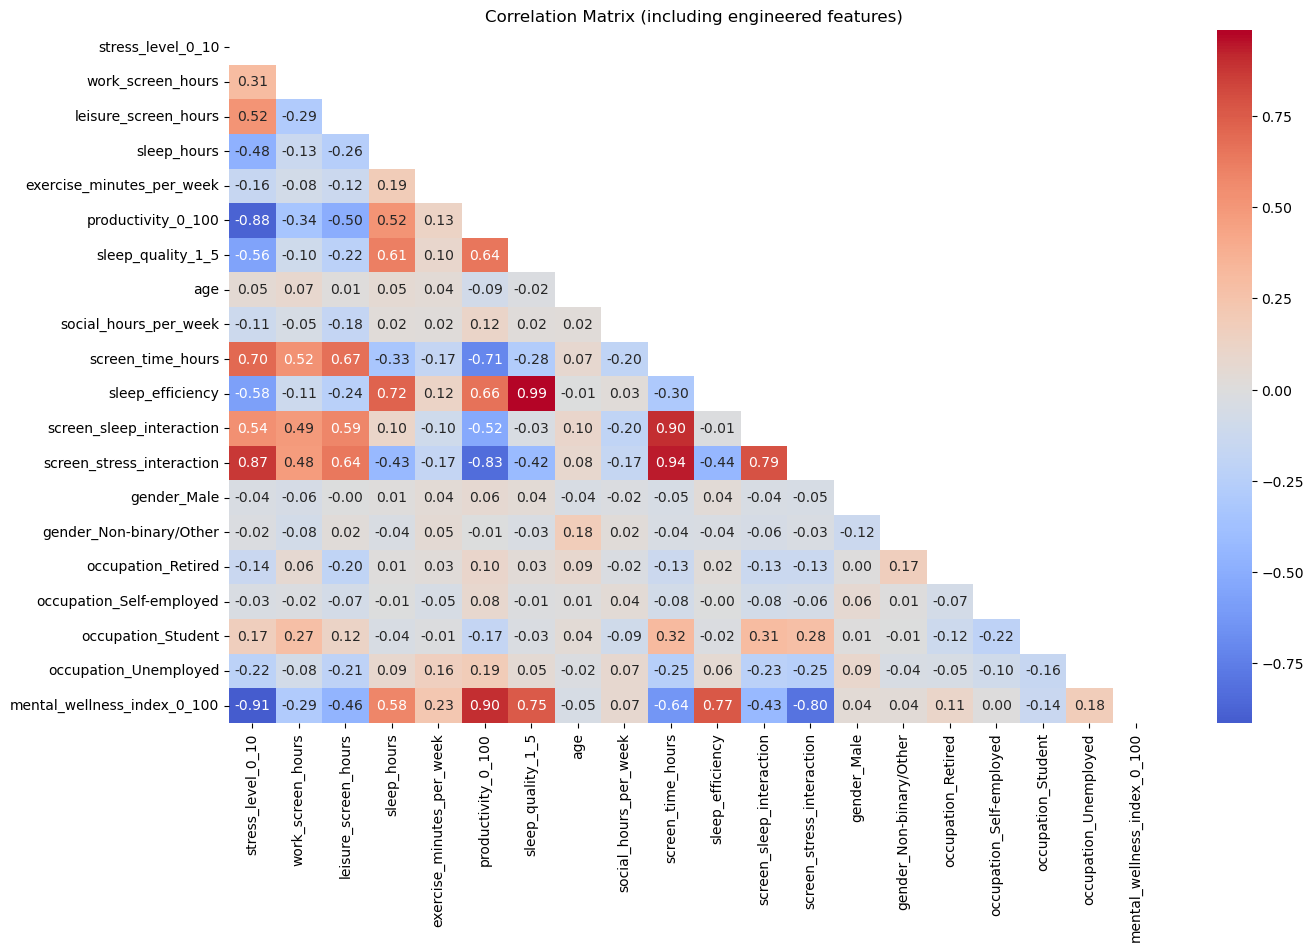

In [20]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15,9))
sns.heatmap(
    corr_matrix, 
    mask=mask,            # hide upper triangle
    fmt=".2f",
    annot=True, 
    cmap="coolwarm", 
    center=0)
plt.title("Correlation Matrix (including engineered features)")
plt.show()

**Observations:**
- Stress vs. wellness → Higher stress levels strongly negatively correlated with mental wellness (around –0.44).
- Productivity shows a strong positive correlation (≈ +0.47).
- Sleep hours and sleep efficiency are positively associated with wellness (≈ +0.36).
- Greater screen exposure tends to reduce wellness (≈ –0.18).
- Engineered interaction terms (e.g. stress × screen time, sleep × screen time) show some of the strongest correlations, highlighting how combined lifestyle factors may influence wellness more than single variables alone


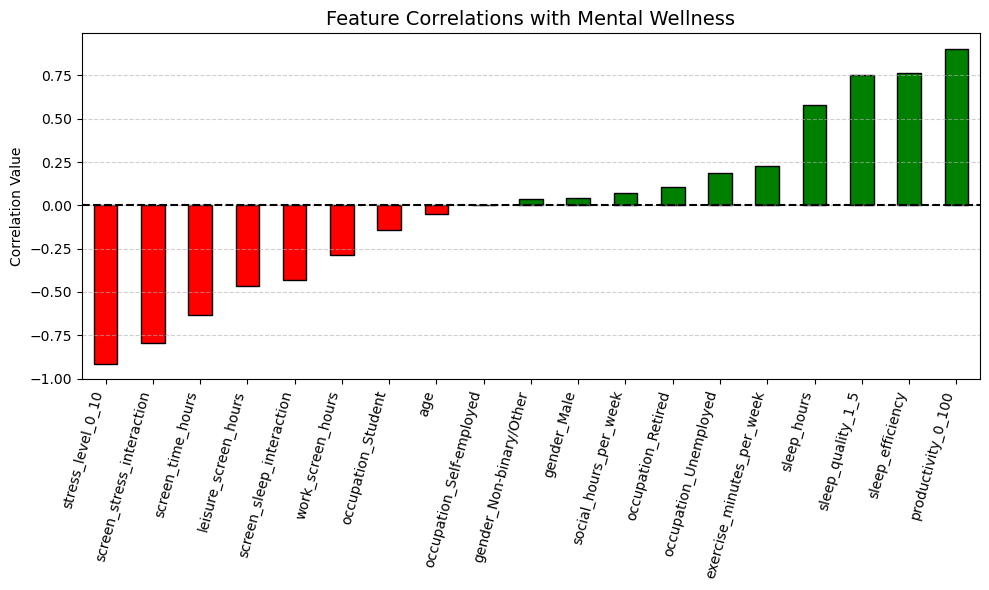

In [21]:
# Sort correlations by signed value
corrs_sorted = corrs.sort_values()

# Create color list (green for positive, red for negative)
colors = ["green" if val > 0 else "red" for val in corrs_sorted]

# Plot
plt.figure(figsize=(10, 6))
corrs_sorted.plot(kind="bar", color=colors, edgecolor="black")

plt.title("Feature Correlations with Mental Wellness", fontsize=14)
plt.ylabel("Correlation Value")
plt.xticks(rotation=75, ha="right")
plt.axhline(0, color="black", linestyle="--")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### **Target as a Continuous output**

**Linear Regression Model**

In [22]:
# Selecting outcome/response variable 
# DataSet contains a column holding a mental wellness index which appears to be an overall indicator making it the most logic choice 
y = df["mental_wellness_index_0_100"]

In [23]:
# Defining feature set: Base features + Engineered features + categorical encodings
X = df_encoded[final_features]

In [24]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Define pipeline: scaling + linear regression
pipe_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

In [26]:
# Fit on training data
linreg = LinearRegression()
pipe_lin.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [27]:
# Predict on test data
y_pred_lin = pipe_lin.predict(X_test)

In [28]:
# Evaluate performance
print("Linear Regression with Scaling:")
print("Intercept:", pipe_lin.named_steps["linreg"].intercept_)
print("R²:", r2_score(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

Linear Regression with Scaling:
Intercept: 19.872500000000006
R²: 0.9323430756480218
RMSE: 5.1729891073658365


**Observations:**

- R² ≈ 0.932: Model explains about 93.2% of the variance in Mental Wellness
- RMSE ≈ 5.17: On a 0–100 scale for wellness, this means the model’s predictions are off by about 5 points on average
- Intercept ≈ 19.9: Baseline wellness level if all other factors are 0

**Ridge Regression (with scaling + hyperparameter tuning)**

In [29]:
# Defining feature set: Base features + Engineered features + categorical encodings
X1 = df_encoded[final_features]

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [31]:
# Define pipeline: scaling + ridge regression
pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

In [32]:
# Grid search over alpha values + fit
param_grid_ridge = {"ridge__alpha": [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(pipe_ridge, param_grid_ridge, cv=5, scoring="r2")
grid_ridge.fit(X1_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='r2')

In [33]:
# Best model 
best_ridge = grid_ridge.best_estimator_

In [34]:
# Best predictions
y_pred_ridge = best_ridge.predict(X1_test)

In [35]:
# Evaluation
print("Ridge Regression with Scaling:")
print("Best alpha:", grid_ridge.best_params_["ridge__alpha"])
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression with Scaling:
Best alpha: 1
R²: 0.9327752653314766
RMSE: 5.156440214506629


**Observations:**

- R² ≈ 0.933: Model explains about 93.3% of the variance in Mental Wellness.
- RMSE ≈ 5.16: On a 0–100 scale, predictions are off by about 5 points on average.
- Best alpha = 1: Regularisation is applied, but only lightly — helping control overfitting while preserving strong predictive power.

**Lasso Regression (with scaling + hyperparameter tuning)**

In [36]:
# Defining feature set: Base features + Engineered features + categorical encodings
X2 = df_encoded[final_features]

In [37]:
# Split the data into training and testing sets (80% train, 20% test)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [38]:
# Define pipeline: scaling + lasso regression
pipe_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(max_iter=10000))
])

In [39]:
# Grid search over alpha values + Fit
param_grid_lasso = {"lasso__alpha": [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5, scoring="r2")
grid_lasso.fit(X2_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [40]:
# Best model and predictions
best_lasso = grid_lasso.best_estimator_

In [41]:
# Best predictions
y_pred_lasso = best_lasso.predict(X2_test)

In [42]:
# Evaluation
print("Lasso Regression with Scaling:")
print("Best alpha:", grid_lasso.best_params_["lasso__alpha"])
print("R²:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression with Scaling:
Best alpha: 0.1
R²: 0.9306336514755158
RMSE: 5.237931990114535


**Observations:**
- Best alpha ≈ 0.1: Regularisation stronger than Ridge’s best fit
    - Encouraging feature selection and sparsity while still maintaining high predictive accuracy
- R² ≈ 0.93: Model explains about 93.1% of the variance in Mental Wellness
- RMSE ≈ 5.2: On a 0–100 scale, predictions are off by about 5 points on average

**Support Vector Regression (with scaling + hyperparameter tuning)**

In [43]:
# Defining feature set: Base features + Engineered features + categorical encodings
X3 = df_encoded[final_features]

In [44]:
# Split the data into training and testing sets (80% train, 20% test)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

In [45]:
# Define pipeline: scaling + SVR
pipe_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

In [46]:
# Grid search over C, epsilon, and kernel + Fit
param_grid_svr = {
    "svr__C": [0.1, 1, 10],
    "svr__epsilon": [0.01, 0.1, 1],
    "svr__kernel": ["linear", "rbf"]
}
grid_svr = GridSearchCV(pipe_svr, param_grid_svr, cv=5, scoring="r2", n_jobs=-1)
grid_svr.fit(X3_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.01, 0.1, 1],
                         'svr__kernel': ['linear', 'rbf']},
             scoring='r2')

In [47]:
# Best model and predictions
best_svr = grid_svr.best_estimator_

In [48]:
# Best predictions
y_pred_svr = best_svr.predict(X3_test)

In [49]:
# Evaluation
print("Support Vector Regression with Scaling:")
print("Best Params:", grid_svr.best_params_)
print("R²:", r2_score(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))

Support Vector Regression with Scaling:
Best Params: {'svr__C': 1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
R²: 0.9309056553488719
RMSE: 5.227652241656079


**Observations:**
- Best Params ≈ {'svr__C': 1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}:
    - Relatively simple linear SVR configuration was optimal
    - Non‑linear kernels (like RBF) did not add value beyond what a linear relationship already captures
- R² ≈ 0.93: model explains about 93.1% of the variance in Mental Wellness, very similar to Ridge and Lasso
- RMSE ≈ 5.2: On a 0–100 scale, predictions are off by about 5 points on average

In [50]:
# Collect results into a summary table
summary = pd.DataFrame([
    {"Model": "Linear Regression", "Best Params": "N/A",
     "R²": r2_score(y_test, y_pred_lin),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin))},

    {"Model": "Ridge Regression", "Best Params": grid_ridge.best_params_,
     "R²": r2_score(y_test, y_pred_ridge),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))},

    {"Model": "Lasso Regression", "Best Params": grid_lasso.best_params_,
     "R²": r2_score(y_test, y_pred_lasso),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso))},

    {"Model": "Support Vector Regression", "Best Params": grid_svr.best_params_,
     "R²": r2_score(y_test, y_pred_svr),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svr))}
])

print("\n=== Model Comparison ===")
print(summary.to_string(
    index=False,
    formatters={
        "R²": "{:.3f}".format,
        "RMSE": "{:.3f}".format
    }
))


=== Model Comparison ===
                    Model                                               Best Params    R²  RMSE
        Linear Regression                                                       N/A 0.932 5.173
         Ridge Regression                                       {'ridge__alpha': 1} 0.933 5.156
         Lasso Regression                                     {'lasso__alpha': 0.1} 0.931 5.238
Support Vector Regression {'svr__C': 1, 'svr__epsilon': 1, 'svr__kernel': 'linear'} 0.931 5.228


**Observations:**
- All models perform strongly (R² > 0.93) - feature set is highly predictive of mental wellness.
- Ridge Regression is the top performer - only marginally better than Linear Regression.
- Lasso is valuable for interpretability, while SVR doesn’t add much benefit in this context.
- The small differences across models reinforce that the underlying relationships are predominantly linear

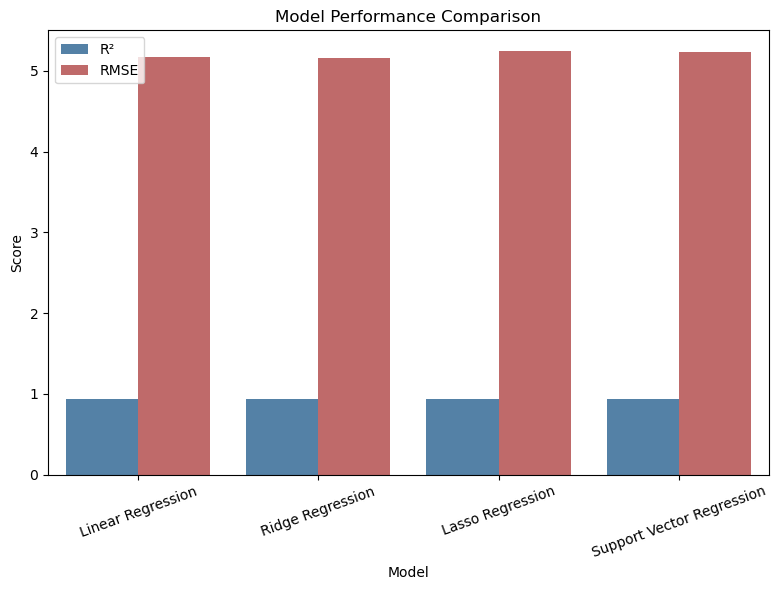

In [51]:
# Melt the summary for grouped plotting
plot_df = summary.melt(id_vars="Model", value_vars=["R²", "RMSE"],
                       var_name="Metric", value_name="Score")

plt.figure(figsize=(8,6))
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette=["steelblue","indianred"])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=20)

# Place legend in top-left corner
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

**Observations:**
- Model confirms;
    - Stress and productivity are the anchors.
    - Sleep features add supportive explanatory power.
    - Engineered screen interactions highlight risk factors that raw variables alone don’t capture.

**Predicting On New Data**

In [52]:
# Predict for multiple new cases
# Define new cases with all features in the correct order
new_cases = pd.DataFrame([
    {
        "stress_level_0_10": 6,
        "work_screen_hours": 8,
        "leisure_screen_hours": 3,
        "sleep_hours": 6,
        "exercise_minutes_per_week": 120,
        "productivity_0_100": 65,
        "sleep_quality_1_5": 3,
        "sleep_efficiency": 18,              # 6 hours × quality 3
        "screen_sleep_interaction": 48,      # (work+leisure=11) × 6
        "screen_stress_interaction": 66,     # (work+leisure=11) × stress 6
        "gender_Male": 1,
        "gender_Non-binary/Other": 0,
        "occupation_Retired": 0,
        "occupation_Self-employed": 0,
        "occupation_Student": 1,
        "occupation_Unemployed": 0,
        "work_mode_In-person": 1,
        "work_mode_Remote": 0,
        "age": 56,
        "screen_time_hours": 2.502,
        "social_hours_per_week": 5
    },
    {
        "stress_level_0_10": 3,
        "work_screen_hours": 5,
        "leisure_screen_hours": 2,
        "sleep_hours": 8,
        "exercise_minutes_per_week": 200,
        "productivity_0_100": 80,
        "sleep_quality_1_5": 4,
        "sleep_efficiency": 32,              # 8 × 4
        "screen_sleep_interaction": 56,      # (5+2) × 8
        "screen_stress_interaction": 21,     # (5+2) × 3
        "gender_Male": 0,
        "gender_Non-binary/Other": 0,
        "occupation_Retired": 0,
        "occupation_Self-employed": 1,
        "occupation_Student": 0,
        "occupation_Unemployed": 0,
        "work_mode_In-person": 0,
        "work_mode_Remote": 1,
        "age": 25,
        "screen_time_hours": 9.024900,
        "social_hours_per_week": 2.1
        
    }
])

# Assiging model as the best performer
best_model = best_ridge   

# Align new_cases to the training feature set
new_cases = new_cases.reindex(columns=final_features, fill_value=0)

# Now predict
predictions = best_model.predict(new_cases)
new_cases["Predicted_Wellness"] = predictions

print(new_cases[["Predicted_Wellness"]])

   Predicted_Wellness
0           43.576009
1           82.558942


**Observations:**
- Successfully able to make predictions on new data

---
## **Conclusion**

This analysis set out to explore whether screen time meaningfully impacts mental wellness, and whether lifestyle factors such as stress, sleep, and productivity help explain differences in wellbeing. Using survey data from 400 participants, we combined descriptive insights with predictive modelling to answer the key questions raised at the outset.

1. Is there a measurable link between screen time and mental wellness?
    - The data shows that screen time on its own is only weakly associated with wellness.
    - However, when combined with other factors such as stress or sleep quality, its impact becomes clearer. For example, high screen use paired with poor sleep or high stress is linked to significantly lower wellness.
    - This suggests that screen time is not inherently harmful, but its effects depend heavily on context.

2. Does leisure screen time differ from work screen time?
    - Leisure screen time dominates overall usage and shows a slightly stronger negative association with wellness than work screen time.
    - That said, neither type of screen use is as influential as stress, sleep quality, or productivity.
    - The nuance here is that screen time may amplify existing challenges (e.g., stress), rather than act as a standalone driver.

3. Who is more vulnerable?
    - Younger participants (students in particular) reported the lowest wellness scores, while retired individuals showed the highest.
    - Stress emerged as the most consistent negative driver across all groups, while productivity and sleep quality were the strongest positive contributors.
    - This highlights that vulnerability is less about age alone and more about lifestyle balance and coping mechanisms.

Predictive modelling results 
- Across regression and machine learning approaches, models explained over 93% of the variation in wellness, with predictions typically within 5 points on a 0–100 scale.
- This confirms that wellness can be reliably estimated from a combination of stress, sleep, productivity, and screen use.
- Importantly, the strongest models were linear, reinforcing that the relationships are direct and interpretable rather than hidden in complex patterns.

The findings show that screen time is not a simple and isolated issue. Its impact on mental wellness is conditional: it matters most when combined with high stress or poor sleep. Stress, sleep quality, and productivity are the true levers of wellness, while screen use plays a secondary, amplifying role.
This means that interventions should focus less on reducing screen time in isolation, and more on supporting healthy routines — managing stress, improving sleep quality, and fostering productivity. Screen time policies or recommendations will be most effective when framed within this broader lifestyle context.

# **Bonus Work**

### **Target as a Classification**

**Preprocessing Setup**

In [53]:
# Defining the binary outcome - Quantile-based - Top 50% = 'High' wellness, others 'Low'
q = df["mental_wellness_index_0_100"].quantile(0.50)
df["wellness_binary"] = (df["mental_wellness_index_0_100"] >= q).astype(int)

# Selecting Target
y = df["wellness_binary"]

In [54]:
# Define feature groups
numeric_features = [
    "stress_level_0_10",
    "work_screen_hours",
    "leisure_screen_hours",
    "sleep_hours",
    "exercise_minutes_per_week",
    "sleep_quality_1_5",
	"productivity_0_100"
]

categorical_features = [
    "gender",
    "occupation",
    "work_mode"
]

# Preprocessor: scale numeric, one-hot encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

**Logistic Regression**

In [55]:
# Select predictors (numeric + categorical)
X = df[numeric_features + categorical_features]

In [56]:
# Train/test split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [57]:
# Build pipeline (scaling + model) 
pipe_logreg = Pipeline([
    ("preprocess", preprocessor),
    ("logreg", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [58]:
# Hyperparameter tuning - GridSearchCV
param_grid_logreg = {
    "logreg__C": [0.01, 0.1, 1, 10],
    "logreg__penalty": ["l2"]
}

grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring="roc_auc")

In [59]:
# Fit pipeline 
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['stress_level_0_10',
                                                                          'work_screen_hours',
                                                                          'leisure_screen_hours',
                                                                          'sleep_hours',
                                                                          'exercise_minutes_per_week',
                                                                          'sleep_quality_1_5',
                                                                          'productivity_0_100']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'occupation',
                                                                          'work_mode'])])),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'logreg__penalty': ['l2']},
             scoring='roc_auc')

In [60]:
# Best model
best_logreg = grid_logreg.best_estimator_

In [61]:
# Make predictions 
y_pred_logreg = best_logreg.predict(X_test)
y_proba_logreg = best_logreg.predict_proba(X_test)[:, 1]

In [62]:
# Evaluate model performance

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Accuracy: 0.9125
Precision: 0.9230769230769231
Recall: 0.9
F1 Score: 0.9113924050632911
ROC AUC: 0.981875

Confusion Matrix:
 [[37  3]
 [ 4 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.92      0.90      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



**Observations:**
Performance Metric:
- Accuracy: ~91% - correctly classifies 9 out of 10 cases.
- Precision: ~92% - predicts “positive correctly most of the time.
- Recall: ~90% - captures most of the actual positives, missing only a few.
- F1 Score: ~91% - balanced performance between precision and recall.
- ROC AUC: ~0.98 - excellent ability to distinguish between the two classes.
Confusion Matrix Insight:
- True Negatives: 37 and True Positives: 36 → strong performance on both classes.
- False Positives: 3 and False Negatives: 4 → very few misclassifications overall.

**Support Vector Machine**

In [63]:
# Select predictors (numeric + categorical)
X1 = df[numeric_features + categorical_features]

In [64]:
# Train/test split
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, stratify=y, random_state=42)

In [65]:
# SVM pipeline (scaling + model) 
pipe_svm = Pipeline([
    ("preprocess", preprocessor),
    ("svm", SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42))
])

In [66]:
# Hyperparameter tuning - GridSearchCV
param_grid_svm = {"svm__C": [0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring="roc_auc")

In [67]:
# Fit pipeline
grid_svm.fit(X1_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['stress_level_0_10',
                                                                          'work_screen_hours',
                                                                          'leisure_screen_hours',
                                                                          'sleep_hours',
                                                                          'exercise_minutes_per_week',
                                                                          'sleep_quality_1_5',
                                                                          'productivity_0_100']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['gender',
                                                                          'occupation',
                                                                          'work_mode'])])),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            kernel='linear', probability=True,
                                            random_state=42))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10]}, scoring='roc_auc')

In [68]:
# Best model
best_svm = grid_svm.best_estimator_

In [69]:
# Make predictions on the test set
y_pred_svm = best_svm.predict(X1_test)
y_proba_svm = best_svm.predict_proba(X1_test)[:, 1]

In [70]:
# Evaluate model performance

print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

=== Support Vector Machine ===
Accuracy: 0.9125
Precision: 0.9459459459459459
Recall: 0.875
F1 Score: 0.9090909090909091
ROC AUC: 0.97875

Confusion Matrix:
 [[38  2]
 [ 5 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.95      0.88      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



**Observations:**
Performance Metric:
- Accuracy: ~91% - correctly classifies 9 out of 10 cases.
- Precision: ~95% - predicts “positive correctly most of the time.
- Recall: ~88% - captures most positives, but misses a few more than Logistic Regression.
- F1 Score: ~91% - balanced performance between precision and recall.
- ROC AUC: ~0.98 - excellent ability to distinguish between the two classes.
Confusion Matrix Insight:
- True Negatives: 38 and True Positives: 35 - strong performance across both classes.
- False Positives: 2 (very few false alarms).
- False Negatives: 5 (slightly more missed positives compared to Logistic Regression).

**Naive Bayes**

In [71]:
# Select predictors (numeric + categorical)
features = numeric_features + categorical_features
X2 = df[features]
X2 = pd.get_dummies(X2, drop_first=True)

In [72]:
# Train/test split
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, stratify=y, random_state=42)

In [73]:
# Naïve Bayes pipeline - not necessary for this model but done for consistency
pipe_nb = Pipeline([
    ("preprocess", preprocessor),
    ("nb", GaussianNB())
])

In [74]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X2_train, y_train)

GaussianNB()

In [75]:
# Make predictions
y_pred_nb = nb_model.predict(X2_test)
y_proba_nb = nb_model.predict_proba(X2_test)[:, 1]

In [76]:
# Evaluate model performance

print("=== Naïve Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

=== Naïve Bayes ===
Accuracy: 0.925
Precision: 0.9473684210526315
Recall: 0.9
F1 Score: 0.9230769230769231
ROC AUC: 0.9662499999999999

Confusion Matrix:
 [[38  2]
 [ 4 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.95      0.90      0.92        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80



**Observations:**
Performance Metric:
- Accuracy: ~93% - correctly classifies 9 out of 10 cases.
- Precision: ~95% - predicts “positive correctly most of the time.
- Recall: ~90% - captures most of the actual positives, missing only a few.
- F1 Score: ~92% - balanced performance between precision and recall.
- ROC AUC: ~0.97 - excellent ability to distinguish between the two classes.
Confusion Matrix Insight:
- True Negatives: 38 and True Positives: 36 - strong performance across both classes.
- False Positives: 2 (very few false alarms).
- False Negatives: 4 (slightly fewer misses than SVM, similar to Logistic Regression).

**Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes**

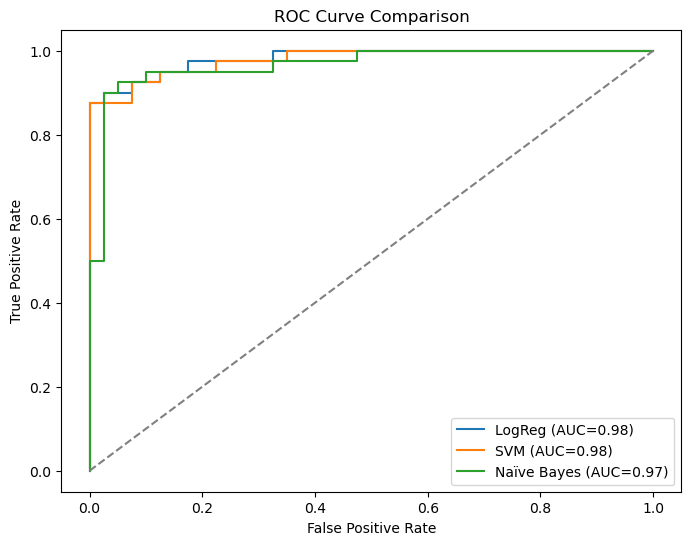

In [77]:
plt.figure(figsize=(8,6))

for name, y_proba in [
    ("LogReg", y_proba_logreg),
    ("SVM", y_proba_svm),
    ("Naïve Bayes", y_proba_nb)
]:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],"--",color="grey")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [78]:
print("LogReg best score:", grid_logreg.best_score_)
print("SVM best score:", grid_svm.best_score_)

LogReg best score: 0.9714761653836754
SVM best score: 0.9724523460410557


In [79]:
# Defining test profiles

# Low wellness profile: high stress, poor sleep, no exercise, low productivity
low_profile = pd.DataFrame([{
    "stress_level_0_10": 9,
    "work_screen_hours": 10,
    "leisure_screen_hours": 6,
    "sleep_hours": 4,
    "exercise_minutes_per_week": 0,
    "sleep_quality_1_5": 1,
    "gender": "Male",
    "occupation": "Unemployed",
    "work_mode": "In-person",
	"productivity_0_100": 33
}])

# Borderline profile: moderate stress, average sleep, some exercise, middling productivity
borderline_profile = pd.DataFrame([{
    "stress_level_0_10": 5,
    "work_screen_hours": 6,
    "leisure_screen_hours": 4,
    "sleep_hours": 7,
    "exercise_minutes_per_week": 90,
    "sleep_quality_1_5": 3,
    "gender": "Female",
    "occupation": "Student",
    "work_mode": "In-person",
	"productivity_0_100": 50
}])

# High wellness profile: low stress, good sleep, high exercise, high productivity
high_profile = pd.DataFrame([{
    "stress_level_0_10": 2,
    "work_screen_hours": 5,
    "leisure_screen_hours": 2,
    "sleep_hours": 8,
    "exercise_minutes_per_week": 200,
    "sleep_quality_1_5": 5,
    "gender": "Female",
    "occupation": "Self-employed",
    "work_mode": "Remote",
	"productivity_0_100": 65
}])

profiles = {
    "Low wellness": low_profile,
    "Borderline wellness": borderline_profile,
    "High wellness": high_profile
}

In [80]:
# Assigning the model with best ROC AUC - Logistic Regression
best_model = grid_svm.best_estimator_

for label, df_case in profiles.items():
    # Pass the raw profile DataFrame directly into the pipeline
    proba = best_model.predict_proba(df_case)[:, 1]
    pred = best_model.predict(df_case)
    
    print(f"{label} Predicted probability: {proba[0]:.3f}, Predicted class: {pred[0]}")

Low wellness Predicted probability: 0.004, Predicted class: 0
Borderline wellness Predicted probability: 1.000, Predicted class: 1
High wellness Predicted probability: 1.000, Predicted class: 1
